# This is ASHRAE Global Thermal Comfort Database II Dataset in which we are predicting the Thermal sensation acceptability using Logistic Regression

# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# 2) Loading of dataset into Pandas DataFrame

In [2]:
data = pd.read_csv('ashrae_db2.01.csv')

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2


In [4]:
data.corr()

,Year,Age,Thermal sensation,Thermal sensation acceptability,Air movement acceptability,PMV,PPD,SET,Clo,Met,...,Velocity_l (fpm),Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F)
Year,1.000000,0.154234,0.003768,0.042624,0.227711,0.173173,0.025472,0.148799,-0.037395,-0.117916,...,0.308471,0.113473,0.032661,0.291397,-0.128714,-0.225452,-0.222538,0.174704,0.505176,0.504121
Age,0.154234,1.000000,0.050789,-0.053667,-0.012373,-0.024898,-0.010180,-0.002765,0.221726,0.009351,...,-0.005020,-0.083786,0.246396,-0.162265,0.036479,-0.145452,-0.180694,-0.523354,-0.162986,-0.163534
Thermal sensation,0.003768,0.050789,1.000000,-0.142789,-0.176218,0.332810,0.120581,0.283625,-0.184438,0.060355,...,0.095436,-0.013429,0.014443,0.086000,0.159655,0.122875,0.110299,-0.111685,0.031322,0.031456
Thermal sensation acceptability,0.042624,-0.053667,-0.142789,1.000000,0.259967,-0.097796,-0.115356,-0.078822,-0.040944,-0.028149,...,-0.008085,0.054061,0.038201,-0.084166,-0.006232,0.066248,0.049924,0.075055,0.023485,0.023462
Air movement acceptability,0.227711,-0.012373,-0.176218,0.259967,1.000000,-0.058755,-0.000600,-0.074023,-0.063428,-0.107772,...,0.090253,-0.000898,0.039867,-0.168729,0.188349,-0.054457,-0.145954,0.010772,0.191692,0.190628
PMV,0.173173,-0.024898,0.332810,-0.097796,-0.058755,1.000000,0.256549,0.944518,-0.005482,0.243532,...,0.290765,-0.029982,-0.031600,0.183663,0.499112,0.245694,0.302130,0.206918,0.369164,0.368223
PPD,0.025472,-0.010180,0.120581,-0.115356,-0.000600,0.256549,1.000000,0.231173,-0.121194,-0.026957,...,0.259358,-0.088235,-0.051475,-0.021032,0.425455,0.281455,0.364768,-0.208721,0.282977,0.281842
SET,0.148799,-0.002765,0.283625,-0.078822,-0.074023,0.944518,0.231173,1.000000,0.166125,0.301480,...,0.160581,-0.009830,-0.011944,0.192478,0.421304,0.200102,0.238094,0.217158,0.282631,0.281882
Clo,-0.037395,0.221726,-0.184438,-0.040944,-0.063428,-0.005482,-0.121194,0.166125,1.000000,0.021563,...,-0.247181,-0.000061,0.039923,-0.277541,-0.188273,-0.223732,-0.256950,0.039919,-0.358776,-0.358483
Met,-0.117916,0.009351,0.060355,-0.028149,-0.107772,0.243532,-0.026957,0.301480,0.021563,1.000000,...,0.093329,-0.047269,-0.036842,-0.104648,-0.071743,0.002815,0.004002,0.127154,-0.228529,-0.228002


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Publication (Citation)                            105928 non-null  object 
 1   Data contributor                                  107583 non-null  object 
 2   Year                                              107335 non-null  float64
 3   Season                                            107342 non-null  object 
 4   Koppen climate classification                     107583 non-null  object 
 5   Climate                                           107583 non-null  object 
 6   City                                              107570 non-null  object 
 7   Country                                           107583 non-null  object 
 8   Building type                                     103384 non-null  object 
 9   Cool

# 3) Preprocessing of Training data

In [6]:
data.drop(['Database','Publication (Citation)'],axis=1,inplace=True)

In [7]:
data['Thermal preference'].unique()

array(['warmer', 'no change', 'cooler', nan], dtype=object)

In [8]:
labelencoder = LabelEncoder()
Koppen_climateclassifications = labelencoder.fit_transform(data['Koppen climate classification'])
Climates = labelencoder.fit_transform(data['Climate'])
Countrys = labelencoder.fit_transform(data['Country'])

In [9]:
data['Koppen climate classification'] = Koppen_climateclassifications
data['Climate'] = Climates 
data['Country'] = Countrys

In [10]:
city_class_dict = {"Tokyo":1, "Texas":2, 'Berkeley':3, 'Chennai':4, 'Hyderabad':5, 'Ilam':6,
'San Francisco':7, 'Alameda':8, 'Philadelphia':9, 'Guangzhou':10,
'Changsha':11, 'Yueyang':12, 'Harbin':13, 'Beijing':14, 'Chaozhou':15, 'Nanyang':16,
'Makati':17, 'Sydney':18, 'Jaipur':19, 'Kota Kinabalu':20, 'Kuala Lumpur':21,
'Beverly Hills':22, 'Putra Jaya':23, 'Kinarut':24, 'Kuching':25, 'Bedong':26,
'Bratislava':27, 'Elsinore':28, 'Gabes':29, 'Gafsa':30, 'El Kef':31, 'Sfax':32,
'Tunis':33, 'Midland':34, 'London':35, 'Lyon':36, 'Gothenburg':37, 'Malmo':38,
'Porto':39, 'Halmstad':40, 'Athens':41, 'Lisbon':42, 'Florianopolis':43,
'BrasÌ_lia':44, 'Recife':45, 'Maceio':46, 'Seoul':47, 'Tsukuba':48, 'Lodi':49,
'Varese':50, 'Imola':51, 'Shanghai':52, 'Liege':53, 'Mexicali':54, 'Hermosillo':55,
'Colima':56, 'Culiacan ':57, 'MÌ©rida':58, 'Tezpur':59, 'Imphal':60, 'Shilong':61,
'Ahmedabad':62, 'Bangalore':63, 'Delhi':64, 'Shimla':65, 'Bandar Abbas':66,
'Karlsruhe':67, 'Bauchi':68, 'Stuttgart':69, 'Hampshire':70, 'Wollongong':71,
'Goulburn':72, 'Singapore':73, 'Cardiff':74, 'Bangkok':75, 'Jakarta':76,
'Montreal':77, 'Brisbane':78, 'Darwin':79, 'Melbourne':80, 'Ottawa':81, 'Karachi':82,
'Multan':83, 'Peshawar':84, 'Quetta':85, 'Saidu Sharif':86, 'Oxford':87,
'San Ramon':88, 'Palo Alto':89, 'Walnut Creek':90, 'Townsville':91,
'Liverpool':92, 'St Helens':93, 'Chester':94, 'Grand Rapids':95, 'Auburn':96,
'Kalgoorlie':97, 'Honolulu':98}
Building_type_class_dict = {'Classroom':1, 'Office':2, 'Others':3, 'Multifamily housing':4,'Senior center':5}
Cooling_startegy_building_level_class_dict = {'Air Conditioned':1, 'Naturally Ventilated':2, 'Mixed Mode':3,'Mechanically Ventilated':4}
Cooling_startegy_operation_mode_for_MM_buildings_class_dict = {'Air Conditioned':1, 'Naturally Ventilated':2, 'Unknown':3}
Heating_strategy_building_level_class_dict = {'Mechanical Heating':1}
Sex_class_dict = {'Female':2, 'Male':1}
Thermal_preference_class_dict = {'warmer':1, 'no change':2, 'cooler':3}
Air_movement_preference_class_dict = {'no change':1, 'more':2, 'less':3}
Humidity_preference_class_dict = {'drier':1, 'no change':2, 'more humid':3}

In [11]:
data['City'] = data['City'].map(city_class_dict)
data['Building type'] = data['Building type'].map(Building_type_class_dict)
data['Cooling startegy_building level'] = data['Cooling startegy_building level'].map(Cooling_startegy_building_level_class_dict)
data['Cooling startegy_operation mode for MM buildings'] = data['Cooling startegy_operation mode for MM buildings'].map(Cooling_startegy_operation_mode_for_MM_buildings_class_dict)
data['Heating strategy_building level'] = data['Heating strategy_building level'].map(Heating_strategy_building_level_class_dict)
data['Sex'] = data['Sex'].map(Sex_class_dict)
data['Thermal preference'] = data['Thermal preference'].map(Thermal_preference_class_dict)
data['Air movement preference'] = data['Air movement preference'].map(Air_movement_preference_class_dict)
data['Humidity preference'] = data['Humidity preference'].map(Humidity_preference_class_dict)

In [12]:
data['Year'].fillna(2002,inplace=True)
data['City'].fillna(0,inplace=True)
data['Building type'].fillna(0,inplace=True)
data['Cooling startegy_building level'].fillna(1,inplace=True)
data['Cooling startegy_operation mode for MM buildings'].fillna(1,inplace=True)
data['Heating strategy_building level'].fillna(0,inplace=True)
data['Age'].fillna(13.189256388091055,inplace=True)
data['Sex'].fillna(0,inplace=True)
data['Thermal sensation'].fillna(0.16300883968656754,inplace=True)
data['Thermal sensation acceptability'].fillna(1,inplace=True)
data['Thermal preference'].fillna(0,inplace=True)
data['Air movement acceptability'].fillna(1,inplace=True)
data['Air movement preference'].fillna(0,inplace=True)
data['PMV'].fillna(1.0862311565319103,inplace=True)
data['PPD'].fillna(20.962094284773425,inplace=True)
data['SET'].fillna(25.769629,inplace=True)
data['Clo'].fillna(0.675876,inplace=True)
data['Met'].fillna(1.206626,inplace=True)
data['activity_10'].fillna(1.194218,inplace=True)
data['activity_20'].fillna(1.257274,inplace=True)
data['activity_30'].fillna(1.264003,inplace=True)
data['activity_60'].fillna(1.319214,inplace=True)
data['Air temperature (C)'].fillna(24.496358,inplace=True)
data['Air temperature (F)'].fillna(76.090540,inplace=True)
data['Ta_h (C)'].fillna(24.569258,inplace=True)
data['Ta_h (F)'].fillna(76.223719,inplace=True)
data['Ta_m (C)'].fillna(24.220964,inplace=True)
data['Ta_l (C)'].fillna(23.450124,inplace=True)
data['Ta_l (F)'].fillna(74.207647,inplace=True)
data['Operative temperature (C)'].fillna(24.504233,inplace=True)
data['Operative temperature (F)'].fillna(76.105627,inplace=True)
data['Radiant temperature (C)'].fillna(24.602735,inplace=True)
data['Radiant temperature (F)'].fillna(76.283592,inplace=True)
data['Globe temperature (C)'].fillna(24.621170,inplace=True)
data['Globe temperature (F)'].fillna(76.316978,inplace=True)
data['Tg_h (C)'].fillna(24.796730,inplace=True)
data['Tg_h (F)'].fillna(76.631297,inplace=True)
data['Tg_m (C)'].fillna(24.375786,inplace=True)
data['Tg_m (F)'].fillna(75.874689,inplace=True)
data['Tg_l (C)'].fillna(22.970135,inplace=True)
data['Tg_l (F)'].fillna(73.341419,inplace=True)
data['Relative humidity (%)'].fillna(47.548293,inplace=True)
data['Humidity preference'].fillna(0,inplace=True)
data['Humidity sensation'].fillna(11.470175,inplace=True)
data['Air velocity (m/s)'].fillna(0.847680,inplace=True)
data['Air velocity (fpm)'].fillna(34.932351,inplace=True)
data['Outdoor monthly air temperature (C)'].fillna(17.446746,inplace=True)
data['Outdoor monthly air temperature (F)'].fillna(63.383538,inplace=True)

In [13]:
data['Thermal comfort'].fillna(0,inplace=True)
data.replace([5.0, 6, 4.0, 1, 3, 2, 4.5, 5.2, 2.5, 2.7, 2.2, 2.3, 2.8, 4.3, 2.4,
       4.2, 3.5, 0, 1.8, 'Na', '2.6', '5.1', '1.7', '3.4', '0.9', '4.3',
       '6', '5', '4', '2', '3', '1', 1.3, 1.5, ' '],[5.0, 6, 4.0, 1, 3, 2, 4.5, 5.2, 2.5, 2.7, 2.2, 2.3, 2.8, 4.3, 2.4,
       4.2, 3.5, 0, 1.8, 0, '2.6', '5.1', '1.7', '3.4', '0.9', '4.3',
       '6', '5', '4', '2', '3', '1', 1.3, 1.5, 0],inplace=True)
data['Thermal comfort'] = pd.to_numeric(data['Thermal comfort'], errors='coerce')

In [14]:
data.drop(columns=['Subject«s height (cm)','Subject«s weight (kg)','Blind (curtain)','Fan','Window','Door','Heater'],axis=1,inplace=True)
data.drop(columns=["Velocity_h (m/s)", "Velocity_h (fpm)",	"Velocity_m (m/s)",	"Velocity_m (fpm)",	"Velocity_l (m/s)",	"Velocity_l (fpm)"], axis=1, inplace=True)
data.drop(['Data contributor','Ta_m (F)'],axis=1,inplace=True)

In [15]:
data['Outdoor monthly air temperature (F)'].mean()

63.38353827171581

In [16]:
data.replace(['Summer', 'Autumn', 'Winter', 'Spring', 'nan'], [1, 2, 3,4,5], inplace=True)
data['Season'].fillna(2,inplace=True)
data.describe()

,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,Cooling startegy_operation mode for MM buildings,Heating strategy_building level,...,Tg_m (F),Tg_l (C),Tg_l (F),Relative humidity (%),Humidity preference,Humidity sensation,Air velocity (m/s),Air velocity (fpm),Outdoor monthly air temperature (C),Outdoor monthly air temperature (F)
count,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,...,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000
mean,2002.010671,2.195914,7.526208,8.736008,43.104989,15.575091,2.033184,1.937537,1.215880,0.351031,...,75.874689,22.970135,73.341419,47.548088,0.233745,10.144445,0.285937,34.493304,17.441633,63.383538
std,8.811439,1.086924,3.547663,5.071223,28.254981,10.228133,0.915037,0.749401,0.570406,0.477295,...,3.902603,1.270483,2.287161,15.024334,0.687971,3.667727,0.446979,72.784835,8.532873,15.393668
min,1979.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,37.500000,5.900000,42.600000,0.000000,0.000000,-3.000000,0.000000,0.000000,-18.400000,-1.100000
25%,1995.000000,1.000000,4.000000,5.000000,19.000000,6.000000,2.000000,1.000000,1.000000,0.000000,...,75.874689,22.970135,73.341419,36.700000,0.000000,11.470175,0.050000,9.840000,15.550000,59.950000
50%,2000.000000,2.000000,8.000000,7.000000,34.000000,17.000000,2.000000,2.000000,1.000000,0.000000,...,75.874689,22.970135,73.341419,47.548293,0.000000,11.470175,0.110000,21.650000,17.446746,63.383538
75%,2011.000000,3.000000,9.000000,13.000000,67.000000,26.000000,2.000000,2.000000,1.000000,1.000000,...,75.874689,22.970135,73.341419,58.200000,0.000000,11.470175,0.400000,34.932351,22.000000,72.000000
max,2016.000000,4.000000,15.000000,18.000000,98.000000,27.000000,5.000000,4.000000,3.000000,1.000000,...,115.700000,36.300000,97.300000,100.000000,3.000000,11.470175,56.170000,11056.410000,45.100000,113.100000


# 4) Data Visualization using Seaborn

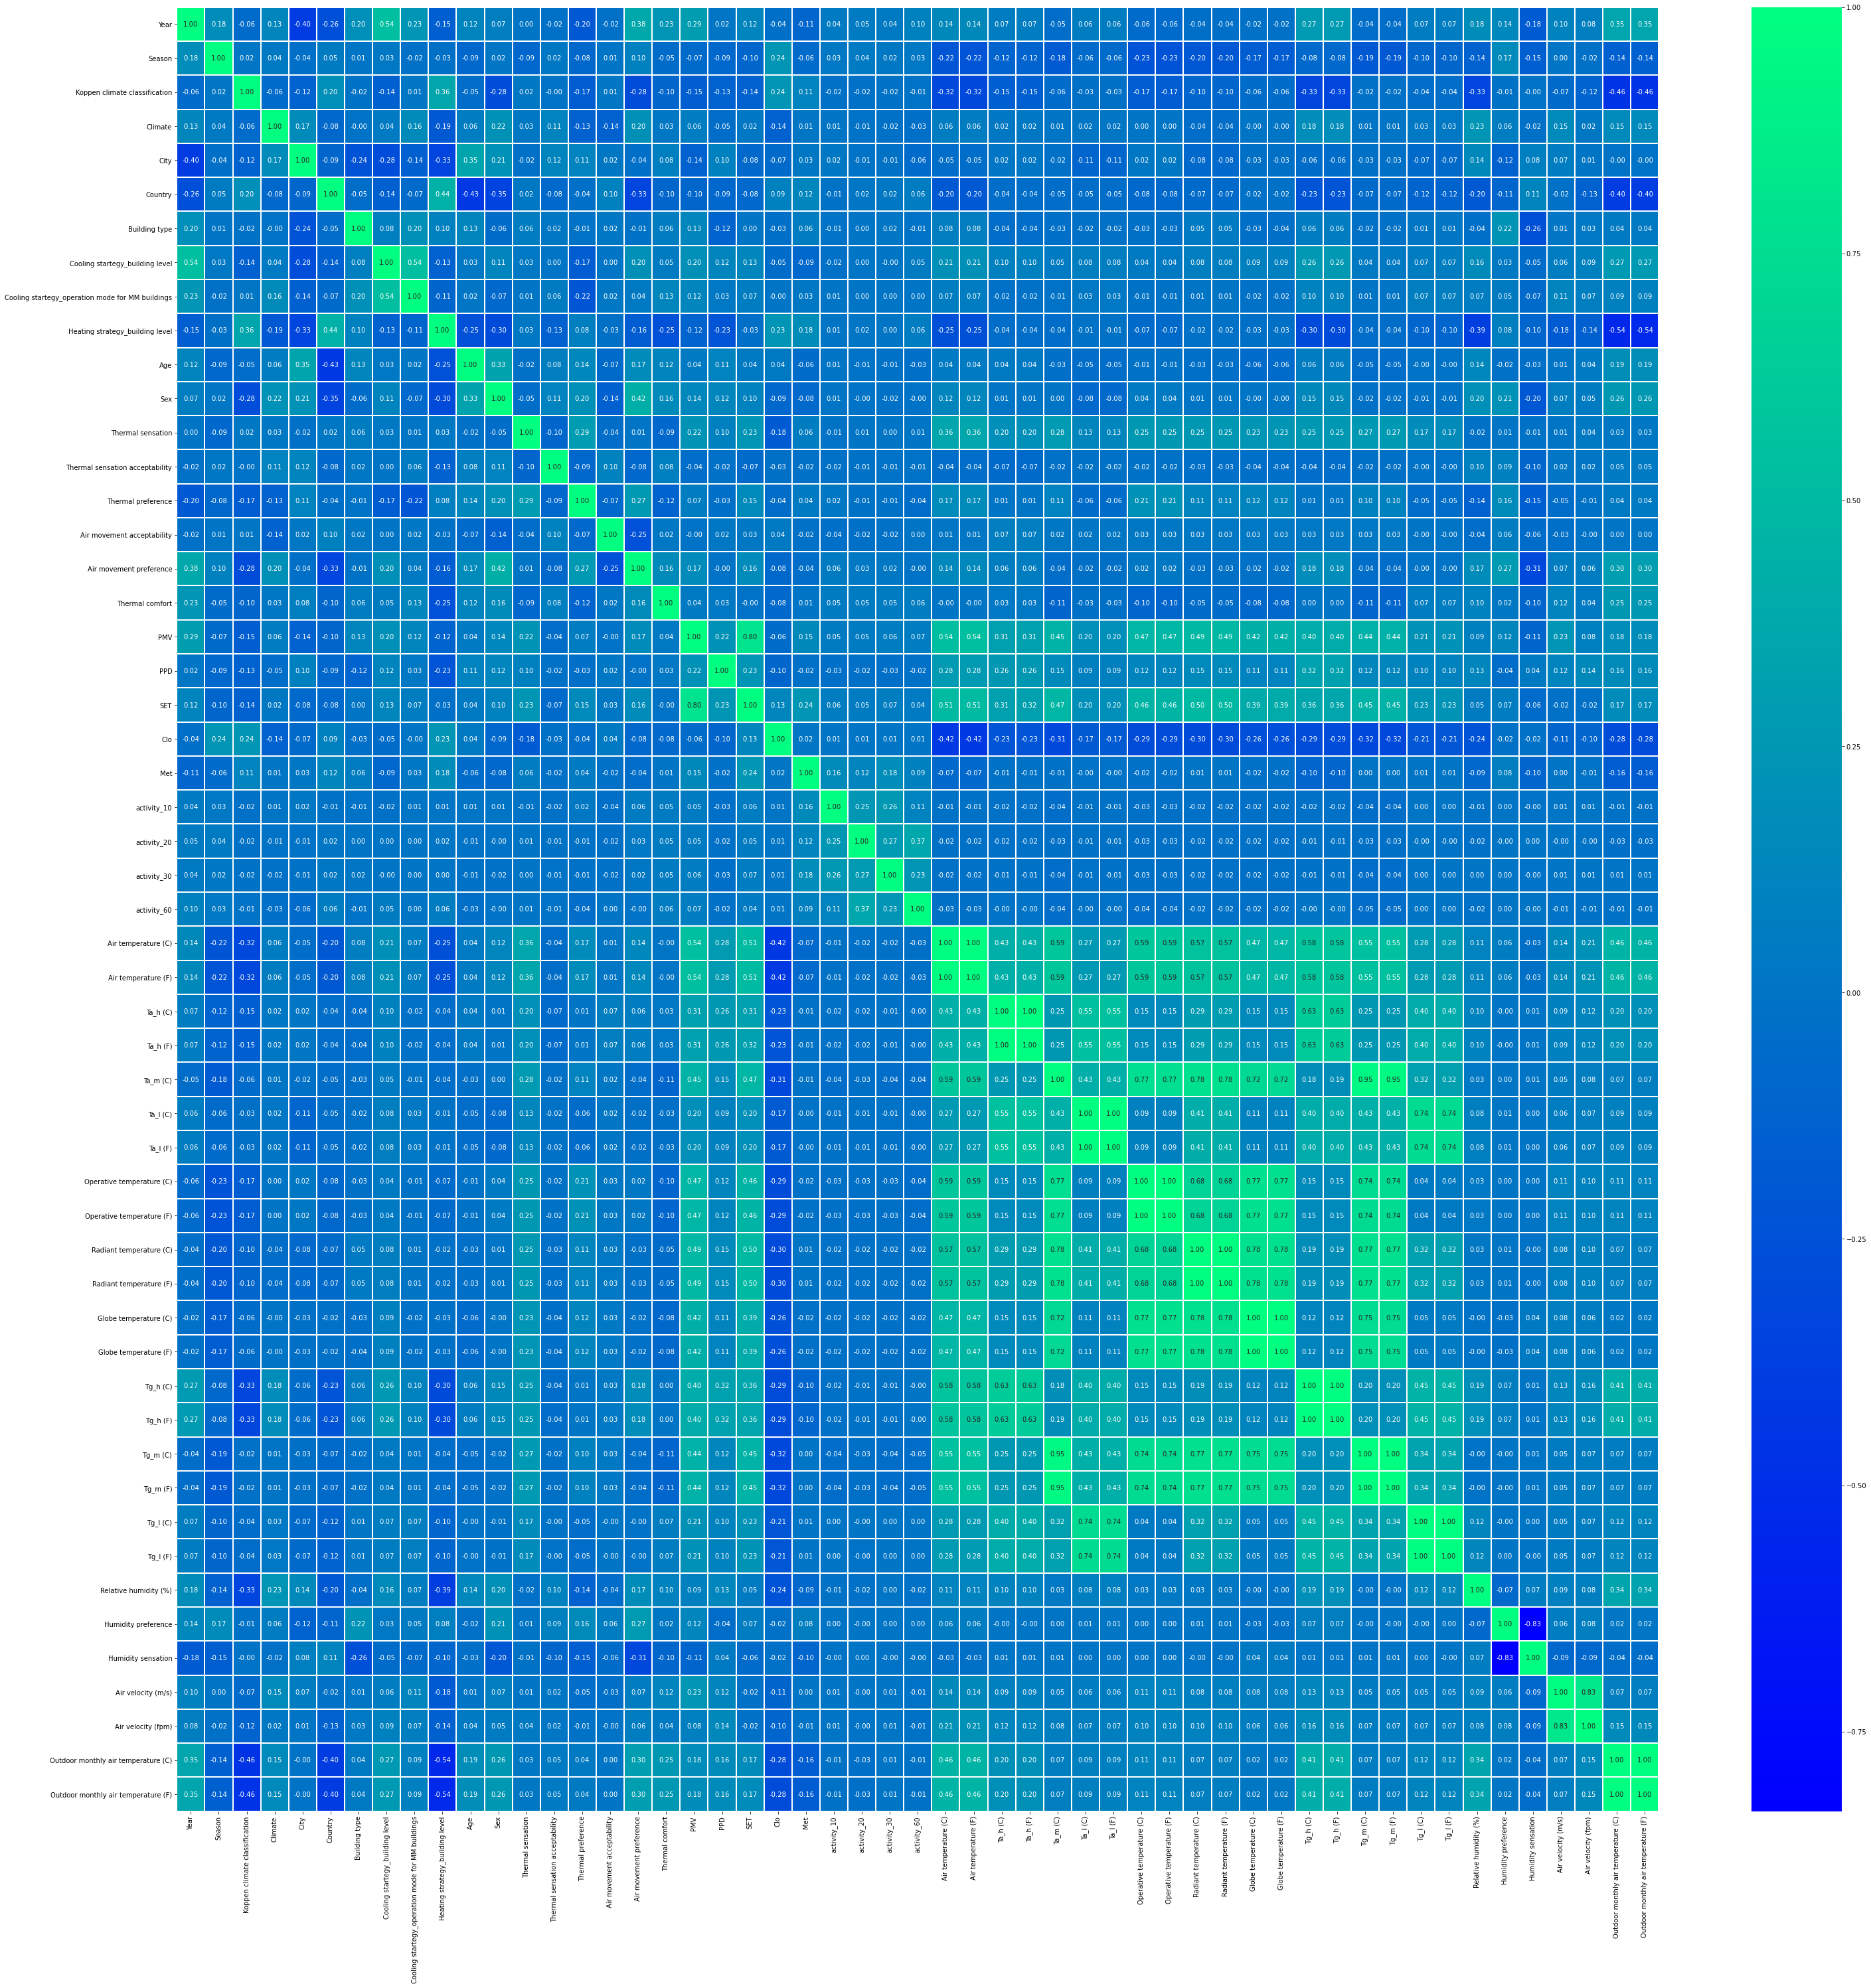

In [17]:
f,ax = plt.subplots(figsize = (50,50))
sns.heatmap(data.corr(), annot = True,  cmap = 'winter',  linewidths =1, fmt = '.2f', ax = ax)
plt.show()

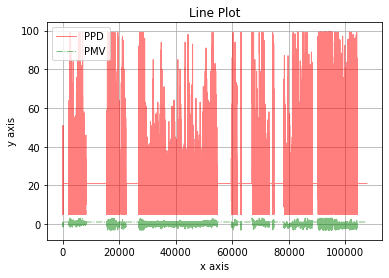

In [18]:
data.PPD.plot(kind = "line", color = "r", label = "PPD", linewidth = 1, alpha = 0.5, grid = "True", linestyle = "-")
data.PMV.plot(kind = "line", color = "g", label = "PMV", linewidth = 1, alpha = 0.5, grid = "True", linestyle = "-.")
plt.legend(loc = "upper left")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Plot")
plt.show()

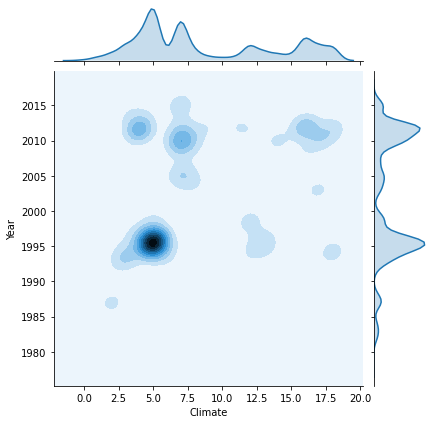

In [19]:
sns.jointplot(x=data["Climate"], y=data["Year"], kind='kde')

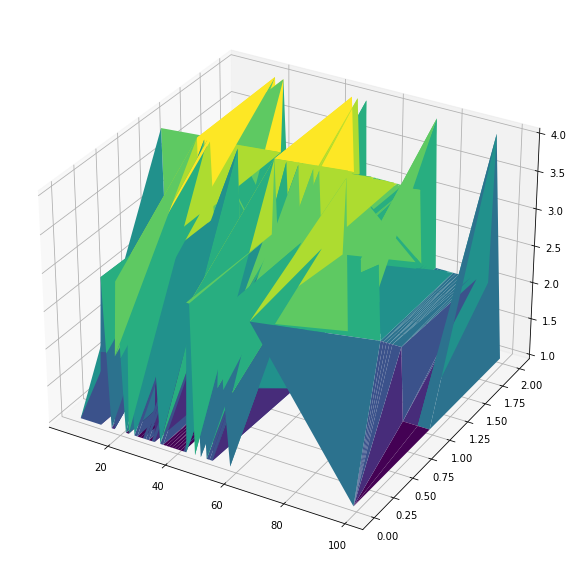

In [20]:
fig = plt.figure(figsize=(10,15))
ax = fig.gca(projection='3d')
ax.plot_trisurf(data['Age'], data['Sex'], data['Season'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(data['Age'], data['Sex'], data['Season'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(data['Age'], data['Sex'], data['Season'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

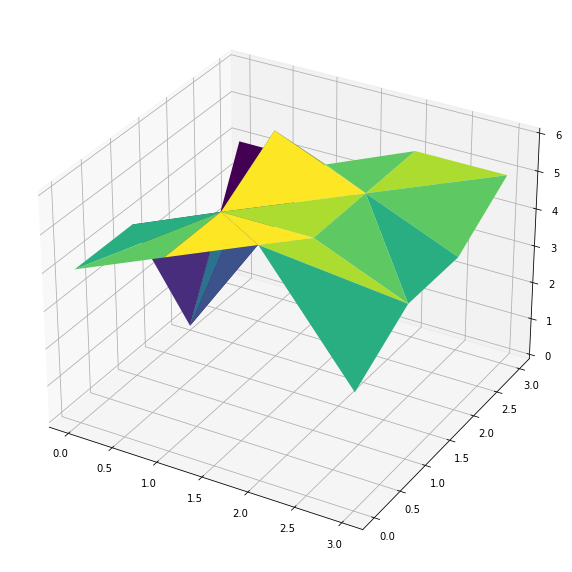

In [21]:
fig = plt.figure(figsize=(10,15))
ax = fig.gca(projection='3d')
ax.plot_trisurf(data['Thermal preference'], data['Humidity preference'], data['Thermal comfort'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(data['Thermal preference'], data['Humidity preference'], data['Thermal comfort'],  cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(data['Thermal preference'], data['Humidity preference'], data['Thermal comfort'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

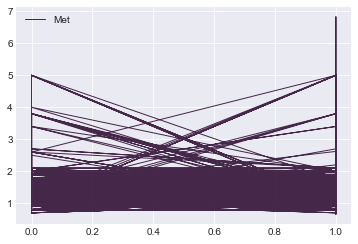

In [22]:
df = data[['PMV','PPD','SET' ,'Clo','Met','Thermal sensation acceptability']]
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('twilight_shifted_r')
 
# multiple line plot
num=0
for column in df.drop(['Thermal sensation acceptability'], axis=1):
    num+=1
plt.plot(df['Thermal sensation acceptability'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)


In [23]:
data.describe()

,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,Cooling startegy_operation mode for MM buildings,Heating strategy_building level,...,Tg_m (F),Tg_l (C),Tg_l (F),Relative humidity (%),Humidity preference,Humidity sensation,Air velocity (m/s),Air velocity (fpm),Outdoor monthly air temperature (C),Outdoor monthly air temperature (F)
count,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,...,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000,107583.000000
mean,2002.010671,2.195914,7.526208,8.736008,43.104989,15.575091,2.033184,1.937537,1.215880,0.351031,...,75.874689,22.970135,73.341419,47.548088,0.233745,10.144445,0.285937,34.493304,17.441633,63.383538
std,8.811439,1.086924,3.547663,5.071223,28.254981,10.228133,0.915037,0.749401,0.570406,0.477295,...,3.902603,1.270483,2.287161,15.024334,0.687971,3.667727,0.446979,72.784835,8.532873,15.393668
min,1979.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,37.500000,5.900000,42.600000,0.000000,0.000000,-3.000000,0.000000,0.000000,-18.400000,-1.100000
25%,1995.000000,1.000000,4.000000,5.000000,19.000000,6.000000,2.000000,1.000000,1.000000,0.000000,...,75.874689,22.970135,73.341419,36.700000,0.000000,11.470175,0.050000,9.840000,15.550000,59.950000
50%,2000.000000,2.000000,8.000000,7.000000,34.000000,17.000000,2.000000,2.000000,1.000000,0.000000,...,75.874689,22.970135,73.341419,47.548293,0.000000,11.470175,0.110000,21.650000,17.446746,63.383538
75%,2011.000000,3.000000,9.000000,13.000000,67.000000,26.000000,2.000000,2.000000,1.000000,1.000000,...,75.874689,22.970135,73.341419,58.200000,0.000000,11.470175,0.400000,34.932351,22.000000,72.000000
max,2016.000000,4.000000,15.000000,18.000000,98.000000,27.000000,5.000000,4.000000,3.000000,1.000000,...,115.700000,36.300000,97.300000,100.000000,3.000000,11.470175,56.170000,11056.410000,45.100000,113.100000


# 5) Model Defining using Logistic Regression 

In [24]:
logi = LogisticRegression()

In [25]:
X = data.drop(['Thermal sensation acceptability'],axis=1)
y = data[['Thermal sensation acceptability']].values
X

,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,Cooling startegy_operation mode for MM buildings,Heating strategy_building level,...,Tg_m (F),Tg_l (C),Tg_l (F),Relative humidity (%),Humidity preference,Humidity sensation,Air velocity (m/s),Air velocity (fpm),Outdoor monthly air temperature (C),Outdoor monthly air temperature (F)
0,2000.0,1.0,7.0,7.0,1.0,13.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,50.2,0.0,11.470175,0.06000,11.810000,25.000000,77.000000
1,2000.0,1.0,7.0,7.0,1.0,13.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,50.2,0.0,11.470175,0.06000,11.810000,25.000000,77.000000
2,2000.0,1.0,7.0,7.0,1.0,13.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,50.2,0.0,11.470175,0.06000,11.810000,25.000000,77.000000
3,2000.0,1.0,7.0,7.0,1.0,13.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,50.2,0.0,11.470175,0.06000,11.810000,25.000000,77.000000
4,2000.0,1.0,7.0,7.0,1.0,13.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,50.2,0.0,11.470175,0.06000,11.810000,25.000000,77.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,1996.0,3.0,2.0,13.0,98.0,27.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,67.4,0.0,11.470175,0.84768,34.932351,17.446746,63.383538
107579,1996.0,3.0,2.0,13.0,98.0,27.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,67.4,0.0,11.470175,0.84768,34.932351,17.446746,63.383538
107580,1996.0,3.0,2.0,13.0,98.0,27.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,67.4,0.0,11.470175,0.84768,34.932351,17.446746,63.383538
107581,1996.0,3.0,2.0,13.0,98.0,27.0,1.0,1.0,1.0,0.0,...,75.874689,22.970135,73.341419,67.4,0.0,11.470175,0.84768,34.932351,17.446746,63.383538


In [26]:
y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

# 6) Spliting data into input and label/output/target

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=12)

In [28]:
X_train

,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,Cooling startegy_operation mode for MM buildings,Heating strategy_building level,...,Tg_m (F),Tg_l (C),Tg_l (F),Relative humidity (%),Humidity preference,Humidity sensation,Air velocity (m/s),Air velocity (fpm),Outdoor monthly air temperature (C),Outdoor monthly air temperature (F)
64155,2012.0,3.0,7.0,7.0,52.0,4.0,1.0,2.0,1.0,0.0,...,75.874689,22.970135,73.341419,47.548293,2.0,0.000000,0.84768,34.932351,17.446746,63.383538
37308,1996.0,3.0,9.0,5.0,34.0,26.0,2.0,2.0,1.0,1.0,...,75.874689,23.200000,73.800000,28.500000,0.0,11.470175,0.04000,7.870000,4.000000,39.000000
31715,1995.0,3.0,9.0,5.0,34.0,26.0,2.0,2.0,1.0,1.0,...,75.874689,23.500000,74.300000,22.800000,0.0,11.470175,0.09000,17.720000,4.000000,39.000000
34823,1996.0,1.0,9.0,5.0,34.0,26.0,2.0,1.0,1.0,1.0,...,75.874689,17.500000,63.400000,44.300000,0.0,11.470175,0.03000,5.910000,4.000000,39.000000
73204,2014.0,3.0,6.0,3.0,66.0,11.0,4.0,2.0,1.0,0.0,...,75.874689,22.970135,73.341419,58.000000,0.0,11.470175,0.05000,9.800000,20.700000,69.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,1996.0,3.0,9.0,5.0,34.0,26.0,2.0,1.0,1.0,1.0,...,75.874689,23.600000,74.500000,29.100000,0.0,11.470175,0.03000,5.910000,4.000000,39.000000
40177,1995.0,3.0,9.0,5.0,34.0,26.0,2.0,2.0,1.0,1.0,...,75.874689,22.970135,73.341419,37.900000,0.0,11.470175,0.09000,17.720000,16.000000,61.000000
19709,2004.0,1.0,15.0,8.0,14.0,4.0,1.0,2.0,1.0,1.0,...,75.874689,22.970135,73.341419,34.000000,0.0,11.470175,0.11000,21.650000,26.000000,79.000000
104091,1995.0,2.0,2.0,13.0,98.0,27.0,1.0,2.0,1.0,0.0,...,75.874689,22.970135,73.341419,75.500000,0.0,11.470175,0.84768,34.932351,17.446746,63.383538


In [29]:
y_train

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [30]:
X_test

,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,Cooling startegy_operation mode for MM buildings,Heating strategy_building level,...,Tg_m (F),Tg_l (C),Tg_l (F),Relative humidity (%),Humidity preference,Humidity sensation,Air velocity (m/s),Air velocity (fpm),Outdoor monthly air temperature (C),Outdoor monthly air temperature (F)
32304,1995.0,3.0,9.0,5.0,34.0,26.0,2.0,2.0,1.0,1.0,...,75.874689,22.500000,72.500000,25.500000,0.0,11.470175,0.03000,5.910000,4.000000,39.000000
40389,1995.0,3.0,9.0,5.0,34.0,26.0,2.0,2.0,1.0,1.0,...,75.874689,22.970135,73.341419,47.548293,0.0,11.470175,0.84768,34.932351,16.000000,61.000000
35532,1996.0,3.0,9.0,5.0,34.0,26.0,2.0,2.0,1.0,1.0,...,75.874689,23.100000,73.600000,23.300000,0.0,11.470175,0.07000,13.780000,4.000000,39.000000
72786,2012.0,3.0,13.0,11.0,65.0,9.0,2.0,3.0,1.0,1.0,...,75.874689,22.970135,73.341419,34.300000,0.0,11.470175,0.07000,12.800000,8.500000,47.300000
60179,2010.0,3.0,1.0,14.0,46.0,2.0,1.0,2.0,1.0,0.0,...,75.874689,22.970135,73.341419,59.500000,0.0,11.470175,0.22000,42.850000,25.000000,77.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14086,2015.0,2.0,7.0,7.0,9.0,27.0,2.0,3.0,1.0,1.0,...,73.300000,22.970135,73.341419,23.200000,0.0,11.470175,0.05000,9.100000,7.000000,44.600000
35085,1996.0,1.0,9.0,5.0,34.0,26.0,2.0,1.0,1.0,1.0,...,75.874689,22.970135,73.341419,43.700000,0.0,11.470175,0.14000,27.560000,4.000000,39.000000
48238,1996.0,1.0,9.0,5.0,34.0,26.0,2.0,1.0,1.0,1.0,...,75.874689,22.970135,73.341419,46.000000,0.0,11.470175,0.01000,2.130000,16.000000,61.000000
88216,1983.0,1.0,8.0,10.0,80.0,0.0,2.0,2.0,1.0,0.0,...,80.600000,22.970135,73.341419,35.100000,0.0,11.470175,0.35000,68.900000,17.446746,63.383538


In [31]:
y_test

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]])

In [32]:
rudy = logi.fit(X_train,y_train)

C:\Program Files\Python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Program Files\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 7) Final Prediction of Model

In [33]:
predict = logi.predict(X_test)

In [34]:
score = accuracy_score(y_test, predict)
score*100

86.99962820671706

Text(0.5, 19.5, 'Predicted label')

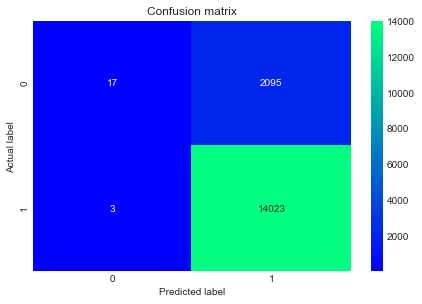

In [35]:
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, cmap="winter" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')